In [2]:
# Import the pandas package, then use the "read_csv" function to read
# the labeled training data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 
train_review = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\HostelWorld\train_review_data.csv")
customer_data = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\HostelWorld\customer_data.csv")
hostel_data = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\HostelWorld\hostel_data.csv")
review_data = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\HostelWorld\Review_data.csv") 
user_data = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\HostelWorld\user_data.csv")
test_review = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\HostelWorld\test_review_data.csv")
sample_data_amended = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\HostelWorld\sample_data_amended.csv")

In [4]:
train_review.head(2)

,customer_id,review_id,review_score,review_text,HostelNumber,review_date,review_language
0,309693,6085536,86,the space in the rooms is not enough specially...,4815.0,2014-01-10 15:34:36,English
1,309693,6244624,97,the wi fi doesn t work properly,34160.0,2014-04-21 20:32:25,English


In [5]:
test_review.head(2)

,customer_id,review_id,review_text,HostelNumber,review_date,review_language
0,331154,5642315,nice hostel well priced and very well located ...,2332,2013-07-14 13:16:38,English
1,1145354,8537815,i had a wonderful stay at this hostel the staf...,79412,2016-01-16 03:54:46,English


In [23]:
print (str(len(train_review))+" rows for training set")
print (str(len(test_review))+" rows for test set")


901701 rows for training set
192035 rows for test set


In [6]:
customer_data.head(2)

,nationality,age,gender,customer_id
0,France,NaN,Male,71775112
1,NaN,NaN,Female,17236506


In [19]:
#change column name to match with the rest of the data frames
hostel_data.columns = ['HostelNumber', 'num_reviews','description','score','features','policies']
hostel_data.head(2)


,HostelNumber,num_reviews,description,score,features,policies
0,17,2289,Home Youth Hostel Valencia by Feetup Hostels o...,92,24 Hour Reception|Adaptors|Air Conditioning|Bi...,Credit Cards Accepted|No Curfew|Non Smoking
1,19,153,Hostal Marlasca is just in the heart of Madrid...,90,24 Hour Reception|Air Conditioning|Airport Tra...,Credit Cards Accepted|No Curfew


In [21]:
review_data.head(2)
#it is same as train_data and test_data

,10983165,4344334,there is not 24 reception staff was not always stay at there,28642,2011-12-26 19:46:14,English
0,11138493,4350334,i booked a private double room but i totally d...,36596.0,2011-12-31 05:51:19,English
1,11225715,4352934,could be cleaner but besides that the staff th...,36373.0,2012-01-01 23:34:22,English


In [11]:
user_data.head(2)
#It is the same as customer_data

,18131165,Unnamed: 1,Unnamed: 2,Male
0,15169619,NaN,NaN,Male
1,13312771,NaN,NaN,Female


#### So we make a combined dataframe to explore

In [15]:
#combining train and test datasets
df_train_test = train_review.append(test_review, ignore_index = True)

In [17]:
#merge dataframe and customer
df_data_customer = pd.merge(df_train_test, customer_data, on='customer_id')

In [20]:
#merge above dataframe with hostel to get a dataframe for us
df= pd.merge(df_data_customer, hostel_data, on='HostelNumber')

##### Select all the rows where the review_score is not nan

In [29]:
df = df[pd.notnull(df['review_score'])]

In [32]:
print (str(len(df))+" rows for data set")

# we have less rows now than in train dataset. Therefore when joining the datasets , we managed to drop from information
# merging customer_id and hostel_number

780462 rows for data set


In [33]:
print ("\n\n---------------------")
print ("DATA SET INFORMATION")
print ("---------------------")
print ("Shape of data set:", df.shape, "\n")
print ("Column Headers:", list(df.columns.values), "\n")
print (df.dtypes)



---------------------
DATA SET INFORMATION
---------------------
Shape of data set: (780462, 15) 

Column Headers: ['HostelNumber', 'customer_id', 'review_date', 'review_id', 'review_language', 'review_score', 'review_text', 'nationality', 'age', 'gender', 'num_reviews', 'description', 'score', 'features', 'policies'] 

HostelNumber       float64
customer_id          int64
review_date         object
review_id            int64
review_language     object
review_score       float64
review_text         object
nationality         object
age                float64
gender              object
num_reviews          int64
description         object
score                int64
features            object
policies            object
dtype: object


As this is an excercise for hostel recommendation , we will set Hostel Number as an index. customer_id , review_id we do not require for exploring about dataset.Also, description, features and policies , will be future work to decide if these effect the recommendation.

In [34]:
df = df.set_index('HostelNumber')


In [37]:
df = df.drop(['customer_id','review_id','description','features','policies'],axis =1)

In [59]:
df.head(20)

,review_date,review_language,review_score,review_text,nationality,age,gender,num_reviews,score
HostelNumber,,,,,,,,,
4815.0,2014-01-10 15:34:36,English,86.0,the space in the rooms is not enough specially...,NaN,NaN,Female,2065,75
4815.0,2012-10-19 13:19:47,English,71.0,good location for train and city centre could ...,NaN,NaN,Female,2065,75
4815.0,2015-05-18 14:57:40,Spanish,80.0,tiene muy buen desayuno te dan hasta nutela lo...,NaN,NaN,Female,2065,75
4815.0,2013-05-29 15:31:52,English,91.0,the dorm beds are pretty comfortable the commo...,NaN,NaN,Male,2065,75
4815.0,2012-08-28 09:56:51,English,66.0,the bedroom didn t have enough space all the b...,NaN,NaN,NaN,2065,75
4815.0,2012-12-06 22:55:49,English,83.0,it was a very nice stay even though the rooms ...,NaN,NaN,NaN,2065,75
4815.0,2015-07-26 05:20:08,English,83.0,wifi is pretty bad it does not connect most of...,NaN,NaN,Male,2065,75
4815.0,2013-06-03 14:33:40,English,80.0,had quite a good stay here nothing to complain...,Germany,23.0,Female,2065,75
4815.0,2014-07-02 07:16:35,English,74.0,nice hostel,Turkey,31.0,Male,2065,75


In [39]:
# Check for duplicates
idsUnique = len(set(df.index))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 761674 duplicate IDs for 780462 total entries


In [41]:
idsUnique = len(set(df.index))
idsUnique

# so there is entries for 18788 hostels in the dataset

18788

In [44]:
#List unique values in the df['index'] column
df.index.unique()

Float64Index([  4815.0,  34160.0,  65881.0,  36020.0,  12168.0,  14275.0,
               38731.0,  42919.0,  51787.0,  45631.0,
              ...
               68780.0,  47343.0,  48425.0,  97297.0,   1903.0,  65416.0,
              266759.0,  93132.0,  71151.0,  76773.0],
             dtype='float64', name='HostelNumber', length=18788)

In [67]:
#Group by index to check the mean of all the unique rows
df_index = df.groupby(df.index).mean()

In [70]:
df_index

,review_score,age,num_reviews,score
HostelNumber,,,,
17.0,89.725641,29.683099,2289,92
19.0,97.000000,NaN,153,90
22.0,88.388889,28.625000,176,91
27.0,87.250000,32.000000,222,100
31.0,83.837838,24.500000,144,81
37.0,80.000000,27.750000,116,0
41.0,90.500000,26.000000,50,87
44.0,93.333333,33.000000,125,0
47.0,74.985075,38.904762,722,80


In [71]:
#get summary of numerical variables
df.describe()

,review_score,age,num_reviews,score
count,780462.000000,286286.000000,780462.000000,780462.000000
mean,84.699203,30.912993,1332.716683,82.041455
std,14.683171,8.728614,1807.999411,16.781544
min,0.000000,16.000000,1.000000,0.000000
25%,77.000000,26.000000,233.000000,80.000000
50%,89.000000,29.000000,653.000000,86.000000
75%,97.000000,33.000000,1672.000000,90.000000
max,100.000000,116.000000,13071.000000,100.000000


In [72]:
# Skewness of the distribution

print(df.skew())

# Values close to 0 show less skew

review_score   -1.394753
age             3.016253
num_reviews     2.883224
score          -3.610562
dtype: float64


In [73]:
#certain values of review_score are 0 let us see if review text or other variables can help

df[df['review_score'] == 0]

,review_date,review_language,review_score,review_text,nationality,age,gender,num_reviews,score
HostelNumber,,,,,,,,,
14348.0,2013-10-22 07:59:52,English,0.0,NaN,NaN,NaN,Female,10350,87
42325.0,2015-07-13 23:56:50,Spanish,0.0,NaN,Uruguay,25.0,Male,353,90
29932.0,2015-08-24 05:07:20,Spanish,0.0,NaN,Spain,51.0,Male,876,90
65385.0,2013-04-03 10:20:32,English,0.0,NaN,NaN,NaN,Male,194,94
63927.0,2015-07-21 11:17:32,English,0.0,the noisiest stay in a hostel i have ever had ...,USA,21.0,Female,381,94
63027.0,2013-07-25 10:50:07,English,0.0,NaN,NaN,NaN,Male,502,80
19818.0,2013-07-18 08:23:06,English,0.0,NaN,Australia,28.0,Female,483,89
20467.0,2015-08-29 12:43:07,English,0.0,it is a house with some beds at living room ar...,Spain,44.0,Male,639,0
35033.0,2013-09-24 18:00:35,English,0.0,NaN,NaN,NaN,Female,833,98


##### For the non-numerical values, we can look at frequency distribution to understand whether they make sense or not.

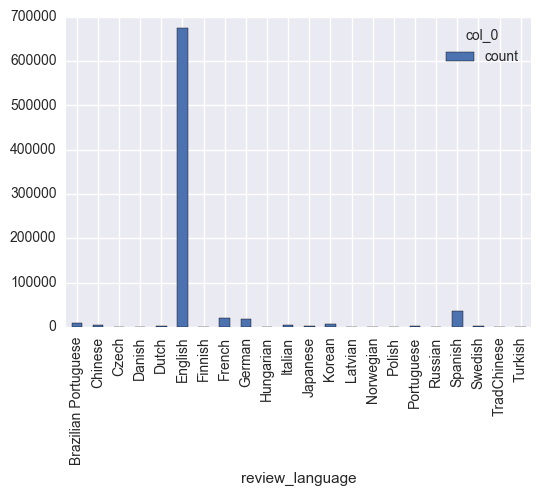

In [83]:
my_tab = pd.crosstab(index = df["review_language"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

In [82]:
df['nationality'].value_counts()


USA                                 52802
Australia                           37737
England                             31909
Canada                              24433
Germany                             15921
Brazil                              15432
France                               9223
Argentina                            8271
South Korea                          8204
China                                7898
New Zealand                          7468
Netherlands                          7443
Ireland                              6762
Italy                                5501
Spain                                4866
Mexico                               4594
Hong Kong                            3887
Switzerland                          3636
Chile                                2948
Scotland                             2946
Sweden                               2922
Poland                               2848
Finland                              2781
Malaysia                          

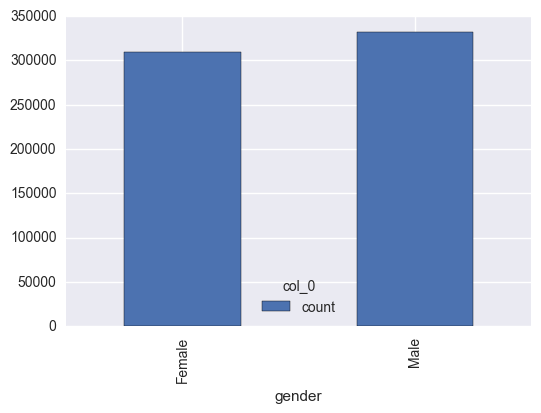

In [84]:
my_tab = pd.crosstab(index = df["gender"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

In [86]:
#Proportion of females vs Males
my_tab/my_tab.sum()

col_0,count
gender,
Female,0.482982
Male,0.517018


In [89]:
# Number of instances belonging to each class
df.groupby('review_score').size()


review_score
0.0          12
3.0           1
6.0           1
9.0           2
11.0          3
14.0          3
17.0          1
20.0       2707
23.0        361
26.0        834
29.0       1077
31.0       1489
34.0       1725
37.0       2223
40.0       2794
43.0       3298
46.0       3986
49.0       4873
51.0       6128
54.0       7660
57.0       9711
60.0      13831
63.0      13810
66.0      16621
69.0      19862
71.0      24831
74.0      30583
77.0      37709
80.0      51364
83.0      51669
86.0      56907
89.0      61938
91.0      68504
94.0      76192
97.0      75255
100.0    132497
dtype: int64

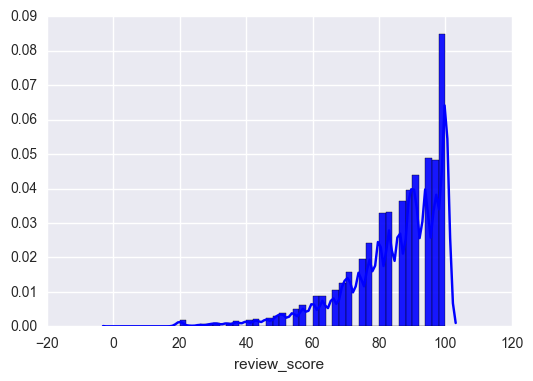

In [90]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df['review_score'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

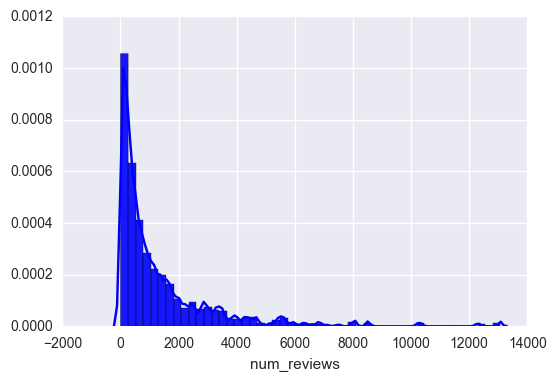

In [92]:
sns.distplot(df['num_reviews'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

In [98]:
df['num_reviews'].max()

13071

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024488743630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000244880F0BA8>]], dtype=object)

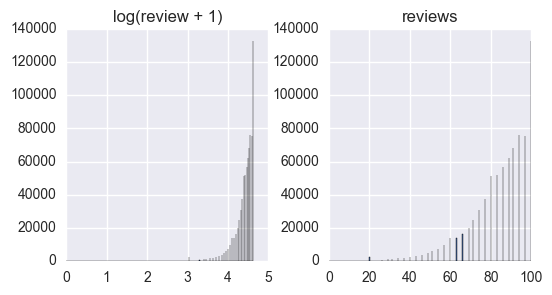

In [105]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
reviews = pd.DataFrame({"reviews":df["review_score"], "log(review + 1)":np.log1p(df["review_score"])})
reviews.hist(bins = 2000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244F00076A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024491C53048>]], dtype=object)

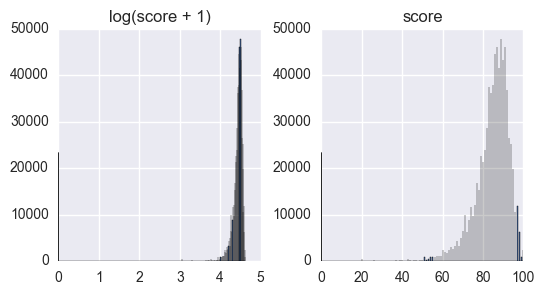

In [108]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
score = pd.DataFrame({"score":df["score"], "log(score + 1)":np.log1p(df["score"])})
score.hist(bins = 2000)

#### There is a huge difference between score and review_score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024501304CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000244FF9B5828>]], dtype=object)

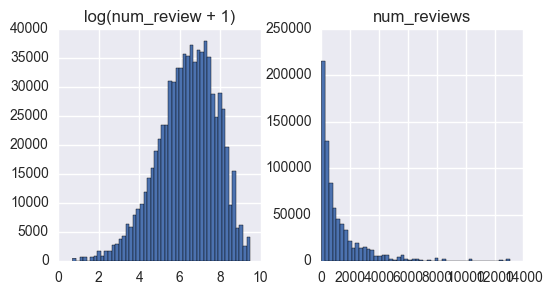

In [109]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
num_reviews = pd.DataFrame({"num_reviews":df["num_reviews"], "log(num_review + 1)":np.log1p(df["num_reviews"])})
num_reviews.hist(bins = 50)

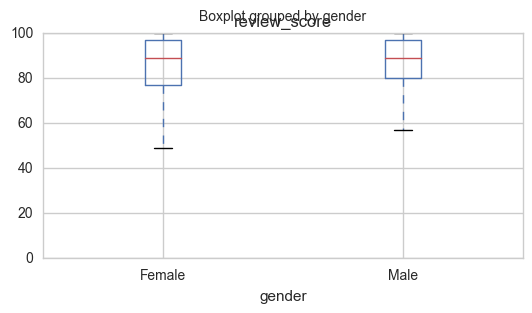

In [116]:
#we look at box plots to understand the distributions
df.boxplot(column='review_score',by ='gender')

##### Therefore female hostel members leave little less favourable reviews than male guests

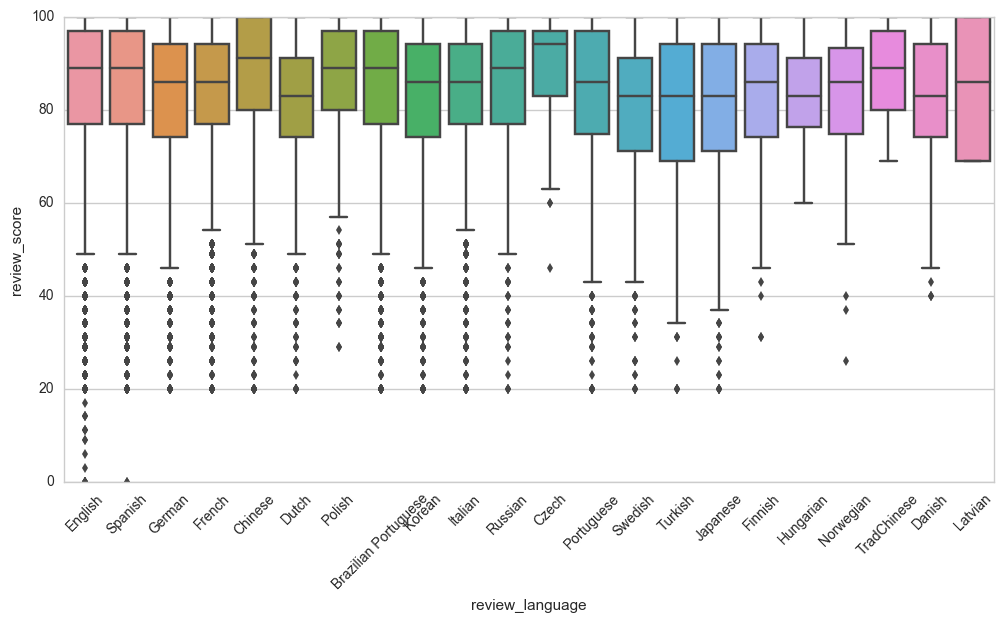

In [119]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'review_language', y = 'review_score',  data = df)
xt = plt.xticks(rotation=45)

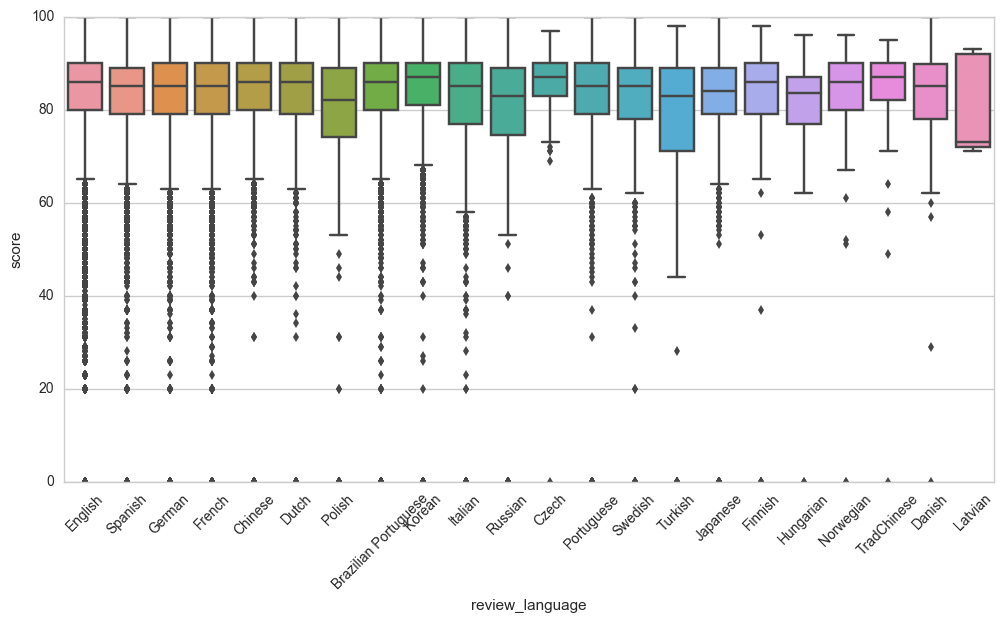

In [120]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'review_language', y = 'score',  data = df)
xt = plt.xticks(rotation=45)

In [125]:
df.columns

Index(['review_date', 'review_language', 'review_score', 'review_text',
       'nationality', 'age', 'gender', 'num_reviews', 'score'],
      dtype='object')

In [126]:
#Reshape the df with review_score as the last column
df_copy  = df[['review_date', 'review_language', 'review_text',
       'nationality', 'age', 'gender', 'num_reviews', 'score', 'review_score']]

##### Correlation Matrix

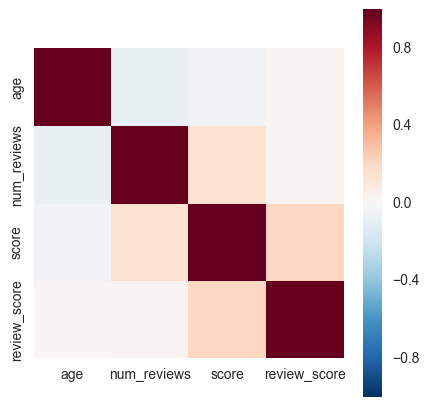

In [127]:
corr = df_copy.iloc[:, 0:].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, vmax=1, square=True)

In [129]:
cor_dict = corr['review_score'].to_dict()
del cor_dict['review_score']
print("List the numerical features decendingly by their correlation with Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Price:

score: 	0.21513529945250984
num_reviews: 	0.023873221416112245
age: 	0.019785778254374484


<function matplotlib.pyplot.show>

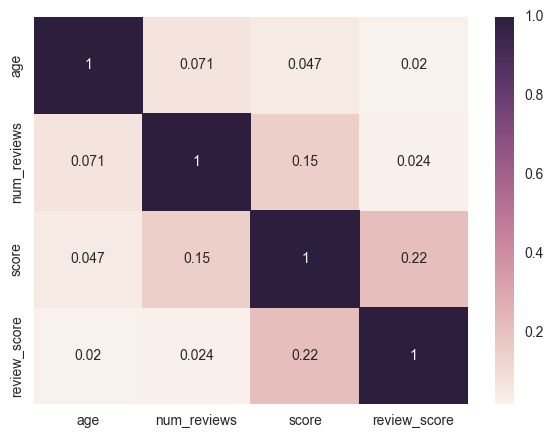

In [130]:
correlationMatrix = df_copy.corr().abs()

plt.subplots(figsize=(7, 5))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show

###### So score is very highly correlated with review_score and then num_reviews

In [131]:
#two-way table
grouped = df.groupby(['age','gender'])
grouped.size()

age    gender
16.0   Female        7
17.0   Female        7
       Male         10
18.0   Female       60
       Male         56
19.0   Female      884
       Male        562
20.0   Female     1659
       Male       1345
21.0   Female     2804
       Male       1953
22.0   Female     4280
       Male       3181
23.0   Female     5940
       Male       5221
24.0   Female     7204
       Male       7097
25.0   Female     8595
       Male       8739
26.0   Female     9193
       Male       9868
27.0   Female     8994
       Male      10081
28.0   Female     8367
       Male      11110
29.0   Female     7389
       Male      10204
30.0   Female     6418
       Male      10427
31.0   Female     5438
                 ...  
80.0   Female        4
81.0   Female        4
82.0   Male          6
85.0   Male          2
86.0   Female        4
       Male          4
89.0   Female        2
91.0   Male          9
92.0   Male          5
94.0   Male          6
95.0   Female       13
96.0   Male         

In [132]:
#two-way table
grouped = df.groupby(['nationality','gender'])
grouped.size()

nationality           gender
Afghanistan           Female       57
                      Male         71
Albania               Female        5
                      Male         15
Alemania              Male          4
Algeria               Female        2
                      Male         32
American              Female        8
                      Male          2
American Samoa        Female       11
                      Male         13
Andorra               Female        6
                      Male         21
Angola                Female        6
                      Male          3
Anguilla              Female        7
                      Male         12
Antarctica            Female       19
                      Male         38
Antigua And Barbuda   Female       11
                      Male          2
Argentina             Female     2461
                      Male       4990
Armenia               Male         54
Australia             Female    15310
                     

In [133]:
#two-way table
grouped = df.groupby(['nationality','review_language'])
grouped.size()

nationality           review_language     
Afghan                English                    2
Afghanistan           English                  131
                      French                     1
                      German                     1
                      Spanish                    1
Albania               English                   18
                      Italian                    5
Alemania              English                    4
Algeria               English                    7
                      French                    31
                      Spanish                    1
American              English                  151
American Samoa        English                   24
Andorra               English                   21
                      Italian                    1
                      Spanish                    7
Angola                Brazilian Portuguese       1
                      English                   13
Anguilla              English          

###### It appears that English is popular language among most of the nationalities

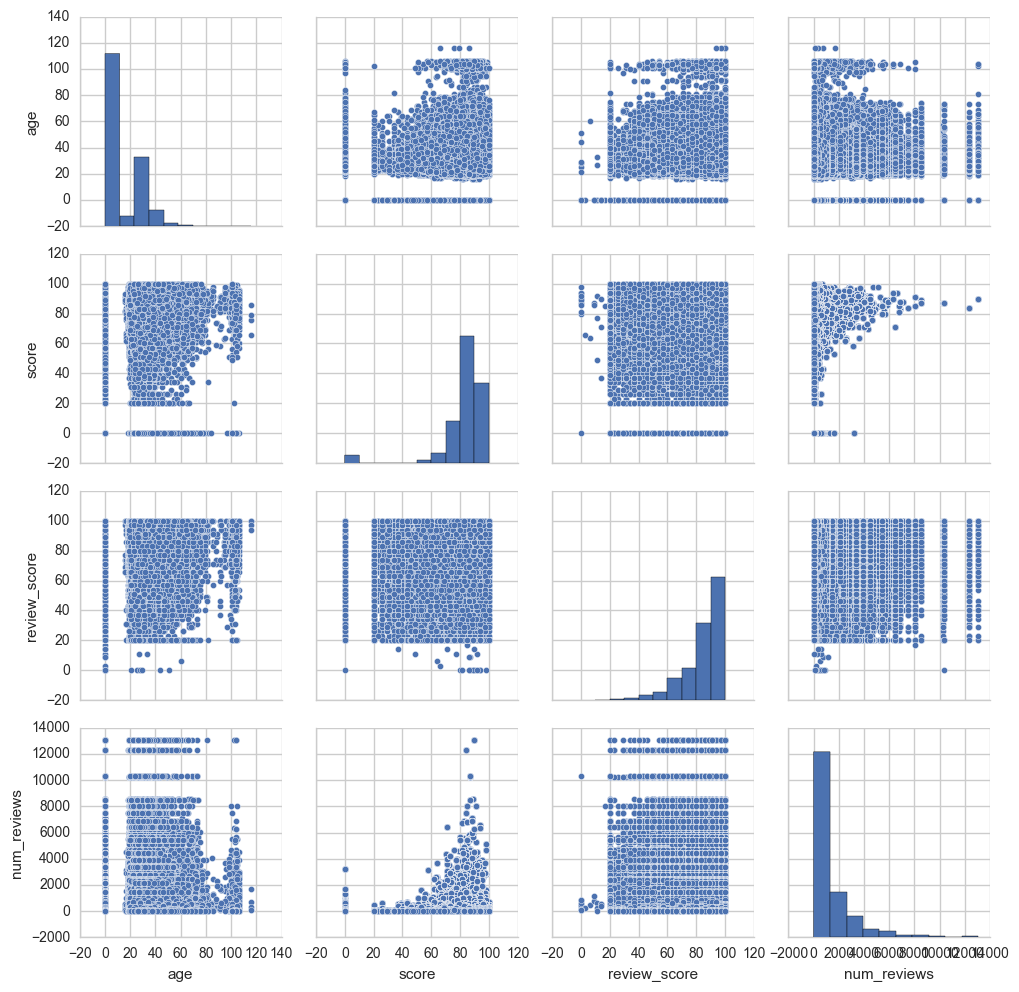

In [137]:
df_sampled = df.loc[:, ['age', 'score', 'review_score','num_reviews']]
df_sampled = df_sampled.fillna(0)
sns.pairplot(df_sampled, size=2.5)

Once an entire pass of all topics has been completed we can
compute the frequency of all opinion patterns that have been
recorded. A pattern is deemed to be valid (from the perspective
of our ability to assign sentiment) if it occurs more than
the average number of occurrences over all patterns . 

For valid patterns we assign sentiment
based on the sentiment of wmin and subject to whether
Sj contains any negation terms within a 4-word-distance of
wmin. If there are no such negation terms then the sentiment
assigned to Ti in Sj is that of the sentiment word in the sentiment
lexicon. If there is a negation word then this sentiment
is reversed. If an opinion pattern is deemed not to be valid
(based on its frequency) then we assign a neutral sentiment
to each of its occurrences within the review set.